# Kaggle Competition: MultiClass classification

<img src="https://octodex.github.com/images/octocat-de-los-muertos.jpg" alt="Cat" title="Cat" width="350" height="200" />
*(image from octodex github)*

**We will first use the dataset training, metadata image and sentiment data to predict the Adoption Speed**

In [641]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LightGBM
import lightgbm as lgb

# Load scikit's classifier library
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix, f1_score,classification_report

from xgboost import XGBClassifier, plot_importance

## Data Preparation 

In [629]:
#Load Data
train =pd.read_csv(r'C:\Users\alorenzodebrionne\Documents\Kaggle\Pet.My\train_features.csv',index_col=0)

In [630]:
train.columns

Index(['Quantity', 'Fee', 'VideoAmt', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'sentiment_document_score', 'sentiment_document_magnitude',
       'metadata_topicality_max', 'metadata_topicality_mean',
       ...
       'MaturitySize_4', 'Sterilized_1', 'Sterilized_2', 'Sterilized_3',
       'Vaccinated_1', 'Vaccinated_2', 'Vaccinated_3', 'FurLength_1',
       'FurLength_2', 'FurLength_3'],
      dtype='object', length=116)

In [631]:
train.head(20)

Quantity  Fee  VideoAmt      PetID  PhotoAmt  AdoptionSpeed  \
0          1  100         0  86e1089a3       1.0              2   
1          1    0         0  4e3a1f99b       1.0              2   
2          1  100         0  369197890       1.0              2   
3          2    0         0  5b4e331cf       2.0              3   
4          1    0         0  e73146163       4.0              2   
5          1    0         0  ad9ad0883       1.0              2   
6          1  100         0  5781e566b       1.0              1   
7          1    0         0  a113449ce       1.0              2   
8          1    0         0  6296e909a       2.0              0   
9          1    0         0  3422e4906       7.0              3   
10         5    0         0  af1035c81       3.0              3   
11         1    0         0  815f4cc08       3.0              3   
12         2    0         0  867308404       3.0              2   
13         1    0         0  6d9b202c9      10.0              3   
14         1    0         0  fbb112b7e       4.0              3   
15         1    0         0  cd7bea671       3.0              3   
16         1    0         0  1bbb46822       1.0              3   
17         1    0         0  74e316be1       2.0              2   
18         1    0         0  061378b30       2.0              2   
19         1    0         0  9eb98f34c       9.0              2   

    sentiment_document_score  sentiment_document_magnitude  \
0                        0.3                           2.4   
1                        0.6                           1.2   
2                        0.0                           1.6   
3                        0.3                           2.8   
4                        0.1                           5.6   
5                        0.6                           1.2   
6                        0.2                           2.1   
7                        0.3                           2.7   
8                       -0.2                           0.7   
9                        0.2                           3.7   
10                       0.3                           1.5   
11                       0.7                           1.5   
12                       0.9                           0.9   
13                       0.0                           0.8   
14                       0.8                           1.6   
15                       0.6                           1.2   
16                       0.5                           1.1   
17                       0.3                           1.2   
18                       0.8                           1.7   
19                       0.0                           0.0   

    metadata_topicality_max  metadata_topicality_mean     ...       \
0                  0.990786                  0.830798     ...        
1                  0.987699                  0.766173     ...        
2                  0.994110                  0.798310     ...        
3                  0.993928                  0.847419     ...        
4                  0.994686                  0.805401     ...        
5                  0.986565                  0.754330     ...        
6                  0.994890                  0.862343     ...        
7                  0.994454                  0.792727     ...        
8                  0.985912                  0.805835     ...        
9                  0.973261                  0.802988     ...        
10                 0.984179                  0.824649     ...        
11                 0.963465                  0.713136     ...        
12                 0.975583                  0.796493     ...        
13                 0.978153                  0.764876     ...        
14                 0.970745                  0.793510     ...        
15                 0.941187                  0.730217     ...        
16                 0.979884                  0.888137     ...        
17                 0.970544      

## Train/Test/Validation Sets

We are going to use 80% of the data for training and the remaining 20% to test the model. 
We will tune the hyperparameters using cross validation datasets. 

In [632]:
#Extracting Features and Output
ids=train[['PetID']]
train_analysis=train.drop(['PetID'],axis=1)

X, y = train_analysis.loc[:, train_analysis.columns != 'AdoptionSpeed'], train_analysis['AdoptionSpeed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)



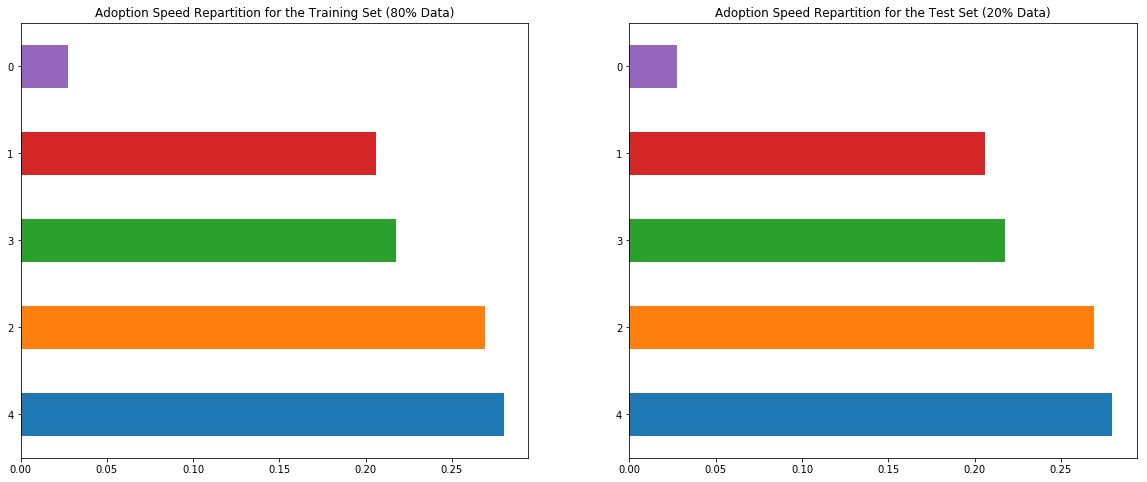

In [633]:
plt.subplot(1, 2, 1)
prob_train  =y_train.value_counts(normalize=True)
prob_train.plot(kind='barh',figsize =(20,6))
plt.title('Adoption Speed Repartition for the Training Set (80% Data)')
plt.subplot(1, 2, 2)

prob  =y_test.value_counts(normalize=True)
prob.plot(kind='barh', figsize =(20,8))
plt.title('Adoption Speed Repartition for the Test Set (20% Data)')
plt.show()

In [634]:
print(len(train_analysis.columns))

115


## Features Selection

Select the features by examining only the training set and avoid overfitting (using XGboost)

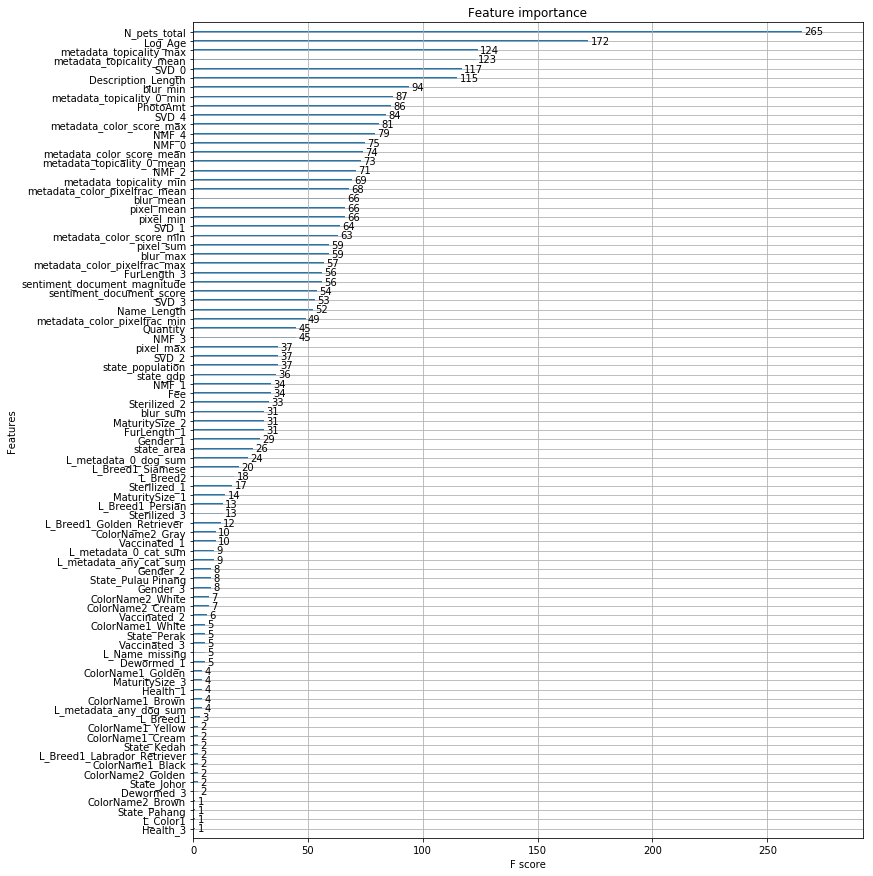

In [635]:
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance

fig, ax = plt.subplots(1,1,figsize=(12,15))
plot_importance(model, ax=ax )
plt.show()

## Modelisation

In a first step we divide our data into a training(80% of Data) and a testing set (20% of Data). To tune the hyperparameter and avoid overfitting we used the technique of Cross Validation (CV). For K-Fold CV, we further split our training set into K number of subsets, called folds.We then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold. For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one! At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.

<img src="https://i.imgur.com/amekoez.jpg" alt="Cat" title="Cat" width="800" height="600" />

### Evaluation with Cohen Kappa measure

In [586]:
def evaluate(model, test_features, test_labels):
  
    predictions = model.predict(test_features)
   
    cohen_kappa= cohen_kappa_score(test_labels, predictions)
    accuracy=accuracy_score(test_labels,predictions)
    f1=f1_score(y_test,predictions,average='micro')
    classification=classification_report(y_test,predictions)
    
    #Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    plt.figure(figsize=(20,6))
    
    sns.heatmap(cm, annot=True)
    plt.title('Confusion matrix')
    plt.figure(figsize = (5,4))
    plt.show()
    #Evaluation Metrics
    print('Cohen Kappa: {:0.2f}.'.format(cohen_kappa))
    print('Accuracy Score: {:0.2f}%.'.format(accuracy))
    print('F1 Score: {:0.2f}%.'.format(f1))
    print(classification)
    

## Random Forest

This will try out 3 X 2 X 4 X 3 X 2 X 1 = **144 combinations of settings!**


In [488]:
gridParams = {'min_samples_split': [2],
                      'min_samples_leaf': [ 3],
                      'max_depth': [10],
                      'max_features':[12],
                      'n_estimators': [500],
                      'class_weight':[{0: w} for w in [5,6]]}

print(gridParams)

{'min_samples_split': [2], 'n_estimators': [100], 'max_depth': [10], 'class_weight': [{0: 5}, {0: 6}], 'min_samples_leaf': [3], 'max_features': [12]}


In [489]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
rf_random = GridSearchCV( rf, gridParams, cv=StratifiedKFold(n_splits  =5),refit=True, verbose=0)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2], 'n_estimators': [100], 'max_depth': [10], 'class_weight': [{0: 5}, {0: 6}], 'min_samples_leaf': [3], 'max_features': [12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [666]:
# Fit the random search model
rf_random.fit(x_train_res, y_train_res)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2], 'n_estimators': [100], 'max_depth': [10], 'class_weight': [{0: 5}, {0: 6}], 'min_samples_leaf': [3], 'max_features': [12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [490]:
rf_random.best_params_

{'class_weight': {0: 5},
 'max_depth': 10,
 'max_features': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

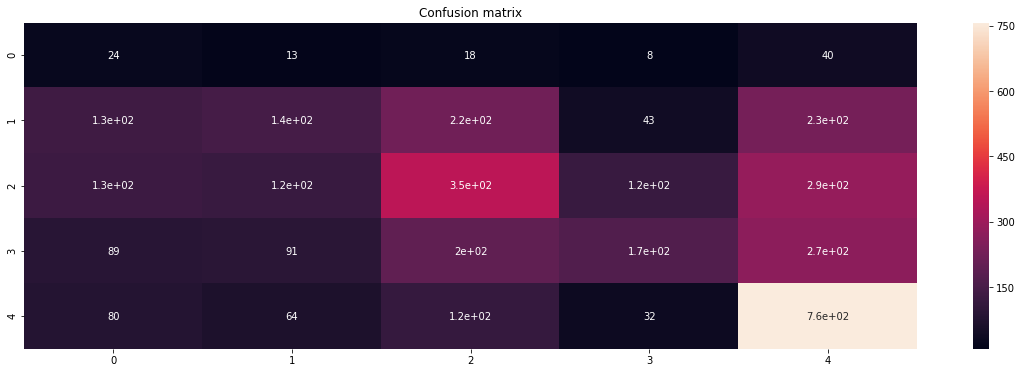

Cohen Kappa: 0.20.
Accuracy Score: 0.39%.
F1 Score: 0.39%.
              precision    recall  f1-score   support

           0       0.05      0.23      0.09       103
           1       0.33      0.18      0.24       773
           2       0.39      0.35      0.37      1009
           3       0.45      0.21      0.28       815
           4       0.48      0.72      0.57      1049

   micro avg       0.39      0.39      0.39      3749
   macro avg       0.34      0.34      0.31      3749
weighted avg       0.41      0.39      0.37      3749



In [667]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [493]:
y_pred = pd.DataFrame() 
y_pred['predictions'] = rf_random.predict(X_test)
prob_rf = pd.concat([y_pred,pd.DataFrame(rf_random.predict_proba(X_test))], axis=1)
prob_rf= prob_rf.add_prefix('rf_')
++

prob_rf

rf_predictions      rf_0      rf_1      rf_2      rf_3      rf_4
0                  1  0.088382  0.344331  0.283241  0.175670  0.108375
1                  2  0.050440  0.181700  0.352273  0.300782  0.114805
2                  3  0.025019  0.095215  0.258519  0.454358  0.166888
3                  1  0.080272  0.260768  0.256458  0.174385  0.228117
4                  2  0.079541  0.259921  0.306619  0.205744  0.148176
5                  4  0.110248  0.160567  0.228488  0.186756  0.313941
6                  4  0.060590  0.220274  0.183510  0.136926  0.398701
7                  4  0.036380  0.157215  0.294639  0.169584  0.342182
8                  1  0.126370  0.267430  0.191216  0.152956  0.262028
9                  4  0.027065  0.096211  0.228548  0.289984  0.358193
10                 2  0.076029  0.276209  0.300822  0.205154  0.141786
11                 4  0.058925  0.128567  0.222458  0.214592  0.375458
12                 1  0.121987  0.308640  0.251623  0.165602  0.152147
13                 4  0.060915  0.123758  0.222458  0.142865  0.450003
14                 1  0.105406  0.383748  0.268753  0.158196  0.083898
15                 4  0.040168  0.098849  0.180472  0.229703  0.450809
16                 1  0.092620  0.340977  0.262631  0.158726  0.145046
17                 4  0.132163  0.128420  0.198467  0.181582  0.359368
18                 4  0.010848  0.085394  0.196244  0.169449  0.538066
19                 4  0.117890  0.233768  0.207766  0.174254  0.266321
20                 2  0.062428  0.236069  0.289468  0.163574  0.248462
21                 2  0.127676  0.238922  0.247645  0.161093  0.224664
22                 3  0.083998  0.145502  0.309225  0.365290  0.095986
23                 4  0.122998  0.072744  0.123439  0.110821  0.569998
24                 2  0.170311  0.222191  0.275662  0.163027  0.168810
25                 4  0.076575  0.186066  0.249632  0.201763  0.285964
26                 4  0.097184  0.212057  0.163534  0.190303  0.336922
27                 4  0.085974  0.232911  0.234398  0.194214  0.252503
28                 4  0.052740  0.207913  0.210831  0.162040  0.366476
29                 4  0.191854  0.106884  0.209731  0.192588  0.298943
30                 2  0.049639  0.228796  0.310635  0.215476  0.195454
31                 4  0.060945  0.139829  0.249861  0.148354  0.401011
32                 4  0.100803  0.153736  0.247277  0.164901  0.333284
33                 2  0.058838  0.304426  0.315706  0.188972  0.132056
34                 1  0.161868  0.340356  0.279633  0.164463  0.053680
35                 4  0.070524  0.138187  0.173926  0.187262  0.430101
36                 3  0.015187  0.136115  0.243028  0.434156  0.171515
37                 4  0.076087  0.085360  0.119348  0.089105  0.630100
38                 3  0.098897  0.099074  0.217859  0.377290  0.206880
39                 4  0.083386  0.155746  0.215624  0.145989  0.399255
40                 2  0.150153  0.260276  0.260469  0.120160  0.208941
41                 3  0.023328  0.157822  0.294941  0.360499  0.163410
42                 4  0.089674  0.224406  0.230473  0.168763  0.286685
43                 4  0.088946  0.206615  0.253051  0.167088  0.284300
44                 3  0.035985  0.123999  0.354074  0.373023  0.112920
45                 4  0.040250  0.145345  0.220963  0.184303  0.409139
46                 4  0.075985  0.196359  0.229796  0.194696  0.303164
47                 2  0.054395  0.197625  0.286303  0.202874  0.258804
48                 2  0.064911  0.262065  0.275442  0.242107  0.155475
49                 2  0.086410  0.250823  0.270085  0.173491  0.219190
50                 3  0.020235  0.137985  0.267293  0.398644  0.175843
51                 4  0.048397  0.148354  0.231972  0.249301  0.321976
52                 1  0.108200  0.323016  0.245890  0.179392  0.143502
53                 2  0.030848  0.164241  0.358160  0.226510  0.220242
54                 4  0.033054  0.132662  0.236464  0.203309  0.394512
55                 2  0.068973

In [636]:
# Choose and initialize a model.
clf = RandomForestClassifier(bootstrap=True, criterion = 'gini', max_depth=80,
                             max_features='auto', min_samples_leaf=5,
                             min_samples_split=5, n_estimators=200)

# Divide the training data into k-folds, k=4 here.
splits = list(StratifiedKFold(n_splits=5, shuffle=True, random_state=1812).split(X_train, y_train))

In [663]:
from imblearn.over_sampling import SMOTE
ratio = {0: 1, 1: 1, 2: 1, 3:1, 4:1}

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
(pd.Series(y_train_res)).value_counts()

4    3148
3    3148
2    3148
1    3148
0    3148
dtype: int64

## XGBoost

More information on parameters tuning in: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
n_estimators = [100]
learning_rate = [0.1]
max_depth =[10]
colsample_bytree=[0.3]

# Create the random grid
gridParams = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'colsample_bytree': colsample_bytree,
               'class_weight':[{0: w} for w in [5,6]]}


In [495]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier()

clf = GridSearchCV(xgb1, gridParams,
                   cv=StratifiedKFold(n_splits  =5), 
                   refit=True, verbose=0)

# Fit the random search model
clf.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [{0: 5}, {0: 6}], 'max_depth': [10], 'colsample_bytree': [0.3], 'n_estimators': [100], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [496]:
clf.best_params_

{'class_weight': {0: 5},
 'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 100}

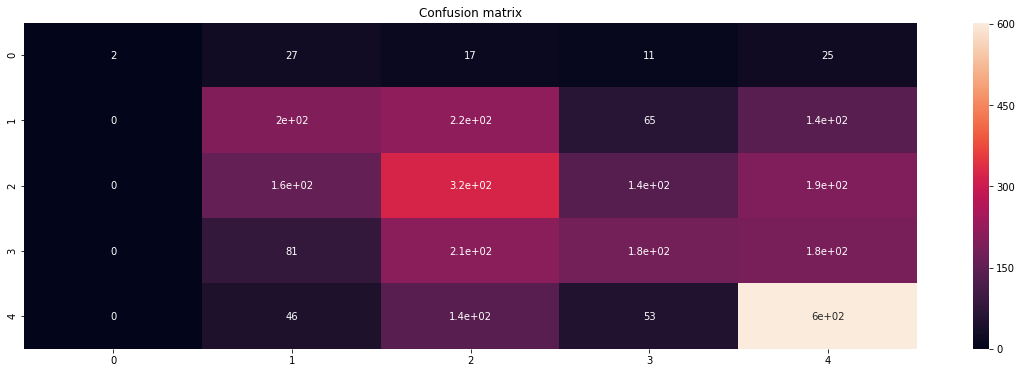

Cohen Kappa: 0.24.
Accuracy Score: 0.43%.
F1 Score: 0.43%.


In [498]:
best_xgb = clf.best_estimator_
xgb_accuracy = evaluate(best_xgb, X_test, y_test)

In [499]:
y_pred = pd.DataFrame() 
y_pred['predictions'] = clf.predict(X_test)
prob_xgb = pd.concat([y_pred,pd.DataFrame(clf.predict_proba(X_test))], axis=1)
prob_xgb= prob_xgb.add_prefix('xgb_')

prob_xgb

xgb_predictions     xgb_0     xgb_1     xgb_2     xgb_3     xgb_4
0                   2  0.015123  0.405522  0.428979  0.125914  0.024462
1                   3  0.009157  0.173051  0.217140  0.522842  0.077810
2                   3  0.004423  0.037160  0.194857  0.577515  0.186044
3                   1  0.012998  0.296504  0.213772  0.233895  0.242831
4                   2  0.010842  0.230417  0.439176  0.186889  0.132676
5                   4  0.015718  0.218260  0.300786  0.142827  0.322410
6                   1  0.009188  0.440424  0.200411  0.069339  0.280638
7                   4  0.004198  0.070784  0.325147  0.252489  0.347382
8                   1  0.025085  0.445456  0.118202  0.205345  0.205912
9                   4  0.004446  0.042179  0.202621  0.298849  0.451905
10                  1  0.007475  0.436293  0.296535  0.103983  0.155714
11                  4  0.009820  0.196512  0.170509  0.240516  0.382643
12                  1  0.046760  0.453459  0.294951  0.136982  0.067849
13                  4  0.005797  0.068495  0.121018  0.173683  0.631007
14                  1  0.005632  0.496583  0.259600  0.179113  0.059071
15                  4  0.005449  0.059202  0.123149  0.207131  0.605068
16                  1  0.010127  0.443657  0.319383  0.150857  0.075977
17                  4  0.014652  0.047924  0.236434  0.183835  0.517155
18                  4  0.007291  0.036414  0.165813  0.145659  0.644824
19                  3  0.007081  0.269717  0.150530  0.312787  0.259885
20                  2  0.009698  0.157414  0.399891  0.087847  0.345150
21                  1  0.019274  0.403146  0.201569  0.210114  0.165897
22                  3  0.008070  0.168223  0.312426  0.489030  0.022251
23                  4  0.045647  0.057209  0.057860  0.057669  0.781615
24                  3  0.086929  0.176535  0.268950  0.373362  0.094224
25                  1  0.018212  0.341247  0.134711  0.297043  0.208787
26                  3  0.016202  0.173866  0.105466  0.439476  0.264990
27                  3  0.050007  0.249176  0.252521  0.276859  0.171438
28                  4  0.017027  0.104624  0.119442  0.188691  0.570217
29                  4  0.051325  0.140889  0.273739  0.155583  0.378464
30                  1  0.009206  0.315709  0.244169  0.245162  0.185753
31                  4  0.010148  0.086902  0.306800  0.168430  0.427720
32                  4  0.027430  0.104110  0.266563  0.185703  0.416195
33                  1  0.015267  0.658601  0.228126  0.043456  0.054550
34                  1  0.038673  0.481831  0.344182  0.118435  0.016880
35                  4  0.007537  0.055983  0.104204  0.212097  0.620179
36                  3  0.005015  0.114163  0.193902  0.588307  0.098612
37                  4  0.035592  0.045495  0.099412  0.075867  0.743634
38                  3  0.006710  0.101295  0.216832  0.542924  0.132239
39                  2  0.026949  0.110386  0.382323  0.197558  0.282783
40                  2  0.021898  0.250237  0.347674  0.194127  0.186065
41                  3  0.002502  0.054684  0.218196  0.682955  0.041663
42                  4  0.020121  0.185447  0.299833  0.157803  0.336796
43                  4  0.014676  0.152578  0.290026  0.206494  0.336226
44                  3  0.020258  0.083956  0.380508  0.478533  0.036744
45                  4  0.019021  0.117804  0.156357  0.180627  0.526191
46                  4  0.017523  0.180457  0.238867  0.209250  0.353903
47                  2  0.008631  0.108541  0.586110  0.171650  0.125068
48                  2  0.008489  0.254837  0.387185  0.193587  0.155903
49                  1  0.017666  0.477467  0.266018  0.173664  0.065185
50                  3  0.007692  0.183570  0.178781  0.534320  0.095637
51                  4  0.003055  0.068815  0.115505  0.227413  0.585212
52                  1  0.026169  0.398459  0.273601  0.196400  0.105372
53                  2  0.015200  0.047206  0.420243  0.200010  0.317341
54                  4  0.005871  0.112397  0.1

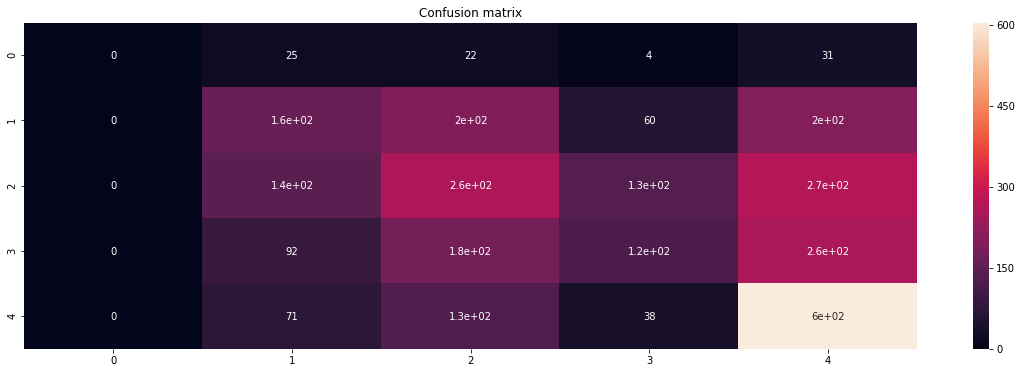

Cohen Kappa: 0.17.
Accuracy Score: 0.38%.
F1 Score: 0.38%.


In [502]:
best_dt = dt_cv.best_estimator_
dt_accuracy = evaluate(best_dt, X_test, y_test)

In [503]:
y_pred = pd.DataFrame() 
y_pred['predictions'] = dt_cv.predict(X_test)
prob_dt = pd.concat([y_pred,pd.DataFrame(dt_cv.predict_proba(X_test))], axis=1)
prob_dt= prob_dt.add_prefix('dt_')

prob_dt

dt_predictions      dt_0      dt_1      dt_2      dt_3      dt_4
0                  1  0.044878  0.380488  0.333659  0.160976  0.080000
1                  3  0.015544  0.163731  0.382383  0.398964  0.039378
2                  3  0.015544  0.163731  0.382383  0.398964  0.039378
3                  1  0.044878  0.380488  0.333659  0.160976  0.080000
4                  2  0.014174  0.223955  0.318923  0.233877  0.209072
5                  4  0.026415  0.066038  0.166038  0.105660  0.635849
6                  4  0.026415  0.066038  0.166038  0.105660  0.635849
7                  2  0.014174  0.223955  0.318923  0.233877  0.209072
8                  4  0.032857  0.172857  0.160000  0.184286  0.450000
9                  4  0.010720  0.081164  0.223583  0.316998  0.367534
10                 2  0.028750  0.265000  0.357500  0.248750  0.100000
11                 3  0.015544  0.163731  0.382383  0.398964  0.039378
12                 2  0.014174  0.223955  0.318923  0.233877  0.209072
13                 4  0.026415  0.066038  0.166038  0.105660  0.635849
14                 2  0.030675  0.312883  0.429448  0.208589  0.018405
15                 2  0.014174  0.223955  0.318923  0.233877  0.209072
16                 1  0.043406  0.332220  0.258765  0.170284  0.195326
17                 4  0.026415  0.066038  0.166038  0.105660  0.635849
18                 4  0.010720  0.081164  0.223583  0.316998  0.367534
19                 1  0.054632  0.315914  0.242280  0.171021  0.216152
20                 1  0.044878  0.380488  0.333659  0.160976  0.080000
21                 1  0.044878  0.380488  0.333659  0.160976  0.080000
22                 2  0.010676  0.192171  0.338078  0.256228  0.202847
23                 4  0.026415  0.066038  0.166038  0.105660  0.635849
24                 1  0.054632  0.315914  0.242280  0.171021  0.216152
25                 4  0.037433  0.216578  0.203209  0.205882  0.336898
26                 1  0.054632  0.315914  0.242280  0.171021  0.216152
27                 4  0.032857  0.172857  0.160000  0.184286  0.450000
28                 4  0.037433  0.216578  0.203209  0.205882  0.336898
29                 4  0.037433  0.216578  0.203209  0.205882  0.336898
30                 2  0.014174  0.223955  0.318923  0.233877  0.209072
31                 4  0.031835  0.179775  0.267790  0.142322  0.378277
32                 4  0.019293  0.125402  0.176849  0.128617  0.549839
33                 2  0.021164  0.322751  0.365079  0.222222  0.068783
34                 2  0.030675  0.312883  0.429448  0.208589  0.018405
35                 4  0.032857  0.172857  0.160000  0.184286  0.450000
36                 2  0.014174  0.223955  0.318923  0.233877  0.209072
37                 4  0.026415  0.066038  0.166038  0.105660  0.635849
38                 4  0.032578  0.211048  0.235127  0.182720  0.338527
39                 4  0.026415  0.066038  0.166038  0.105660  0.635849
40                 2  0.026936  0.242424  0.303030  0.154882  0.272727
41                 3  0.015544  0.163731  0.382383  0.398964  0.039378
42                 4  0.032578  0.211048  0.235127  0.182720  0.338527
43                 1  0.054632  0.315914  0.242280  0.171021  0.216152
44                 3  0.015544  0.163731  0.382383  0.398964  0.039378
45                 4  0.032857  0.172857  0.160000  0.184286  0.450000
46                 4  0.032578  0.211048  0.235127  0.182720  0.338527
47                 3  0.024793  0.132231  0.289256  0.347107  0.206612
48                 3  0.011070  0.143911  0.250923  0.394834  0.199262
49                 2  0.014174  0.223955  0.318923  0.233877  0.209072
50                 3  0.011070  0.143911  0.250923  0.394834  0.199262
51                 3  0.011070  0.143911  0.250923  0.394834  0.199262
52                 1  0.043406  0.332220  0.258765  0.170284  0.195326
53                 1  0.043406  0.332220  0.258765  0.170284  0.195326
54                 2  0.010676  0.192171  0.338078  0.256228  0.202847
55                 2  0.014174

## LightGBM

In [649]:
# Create parameters to search
gridParams = {
    'learning_rate': [0.1],
    'n_estimators': [50],
    'num_leaves': [12],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65,],
    'subsample' : [0.7],
    'reg_alpha' : [1],
    'reg_lambda' : [1.2],
     'class_weight':[{0: w} for w in [5,6]] }

# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
mdl = lgb.LGBMClassifier(learning_rate=0.1,
    n_estimators=50,
    num_leaves= 12,
    boosting_type= 'gbdt',
    objective ='multiclass',
    random_state= 501, # Updated from 'seed'
    colsample_bytree=0.65,
    subsample =0.7,
    reg_alpha =1,
    reg_lambda =[1.2],
    class_weight= {0: 5}  )

# To view the default model params:
mdl.get_params().keys()

embeded_lgb_selector = SelectFromModel(mdl, threshold='1.25*median')
embeded_lgb_selector.fit(X_train, y_train)


embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()

embeded_lgb_feature

['Quantity',
 'PhotoAmt',
 'sentiment_document_score',
 'sentiment_document_magnitude',
 'metadata_topicality_max',
 'metadata_topicality_mean',
 'metadata_topicality_min',
 'metadata_topicality_0_mean',
 'metadata_topicality_0_max',
 'metadata_topicality_0_min',
 'L_metadata_0_dog_sum',
 'L_metadata_any_cat_sum',
 'L_metadata_any_dog_sum',
 'metadata_color_pixelfrac_mean',
 'metadata_color_pixelfrac_min',
 'metadata_color_pixelfrac_max',
 'metadata_color_score_mean',
 'metadata_color_score_min',
 'metadata_color_score_max',
 'pixel_mean',
 'blur_mean',
 'pixel_min',
 'blur_min',
 'pixel_max',
 'blur_max',
 'pixel_sum',
 'blur_sum',
 'state_gdp',
 'state_population',
 'state_area',
 'L_Breed1',
 'Name_Length',
 'Description_Length',
 'N_pets_total',
 'Log_Age',
 'NMF_0',
 'NMF_1',
 'NMF_2',
 'NMF_3',
 'NMF_4',
 'SVD_0',
 'SVD_1',
 'SVD_2',
 'SVD_3',
 'SVD_4',
 'Gender_1',
 'Gender_2',
 'MaturitySize_2',
 'Sterilized_1',
 'Sterilized_2',
 'Sterilized_3',
 'Vaccinated_1',
 'FurLength_1',

In [664]:
lgb_cv = GridSearchCV(mdl, gridParams,
                   cv=StratifiedKFold(n_splits  =5), 
                   refit=True, verbose=2)

# Fit the random search model
lgb_cv.fit(X_train[embeded_lgb_feature], y_train)



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [651]:
lgb_cv.best_params_

{'boosting_type': 'gbdt',
 'class_weight': {0: 5},
 'colsample_bytree': 0.65,
 'learning_rate': 0.1,
 'n_estimators': 50,
 'num_leaves': 12,
 'objective': 'multiclass',
 'random_state': 501,
 'reg_alpha': 1,
 'reg_lambda': 1.2,
 'subsample': 0.7}

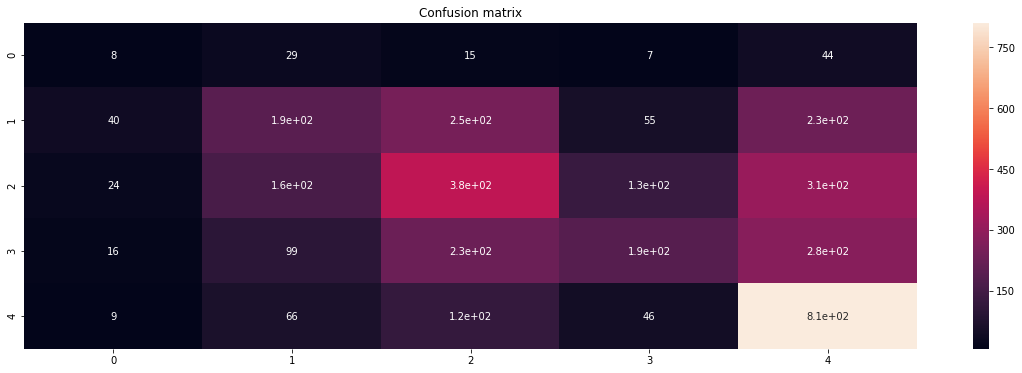

Cohen Kappa: 0.23.
Accuracy Score: 0.42%.
F1 Score: 0.42%.
              precision    recall  f1-score   support

           0       0.08      0.08      0.08       103
           1       0.35      0.25      0.29       773
           2       0.39      0.38      0.38      1009
           3       0.44      0.23      0.30       815
           4       0.48      0.77      0.59      1049

   micro avg       0.42      0.42      0.42      3749
   macro avg       0.35      0.34      0.33      3749
weighted avg       0.41      0.42      0.40      3749



In [653]:
best_lgb = lgb_cv.best_estimator_

lgb_accuracy = evaluate(best_lgb, X_test[embeded_lgb_feature], y_test)

In [521]:
y_pred = pd.DataFrame() 
y_pred['predictions'] = lgb_cv.predict(X_test)
prob_lgb = pd.concat([y_pred,pd.DataFrame(lgb_cv.predict_proba(X_test)),y_test], axis=1)
prob_lgb= prob_lgb.add_prefix('lgbm_')

prob_lgb

lgbm_predictions    lgbm_0    lgbm_1    lgbm_2    lgbm_3    lgbm_4  \
0                    1  0.114892  0.413519  0.268663  0.141538  0.061388   
1                    3  0.082405  0.144350  0.268917  0.414146  0.090181   
2                    3  0.033610  0.089204  0.237107  0.482326  0.157753   
3                    2  0.103812  0.229688  0.247245  0.202718  0.216537   
4                    2  0.075871  0.272441  0.306823  0.204438  0.140427   
5                    4  0.097006  0.162539  0.217233  0.133760  0.389462   
6                    4  0.136371  0.266632  0.192770  0.127054  0.277173   
7                    4  0.054375  0.142960  0.239295  0.195734  0.367637   
8                    4  0.145682  0.251371  0.110841  0.111295  0.380811   
9                    4  0.052031  0.082854  0.243587  0.294462  0.327066   
10                   2  0.110347  0.257860  0.277440  0.196840  0.157513   
11                   4  0.080450  0.171011  0.215506  0.252257  0.280776   
12                   1  0.182583  0.369563  0.235528  0.127414  0.084911   
13                   4  0.077627  0.076701  0.161803  0.101527  0.582342   
14                   1  0.063687  0.351117  0.350245  0.178084  0.056867   
15                   4  0.065261  0.093542  0.227171  0.174367  0.439659   
16                   1  0.111787  0.410691  0.241112  0.142731  0.093679   
17                   4  0.132211  0.167599  0.187489  0.149591  0.363110   
18                   4  0.021823  0.049673  0.166029  0.175904  0.586571   
19                   4  0.076674  0.195157  0.206312  0.168772  0.353086   
20                   2  0.112317  0.266413  0.330397  0.169594  0.121279   
21                   1  0.114732  0.315082  0.237979  0.138937  0.193270   
22                   3  0.159857  0.162680  0.192467  0.415331  0.069664   
23                   4  0.177353  0.089739  0.086757  0.082212  0.563940   
24                   1  0.187617  0.311700  0.199860  0.139882  0.160941   
25                   4  0.121755  0.158274  0.215089  0.183984  0.320897   
26                   4  0.161275  0.129550  0.151056  0.156167  0.401953   
27                   2  0.179166  0.177572  0.254219  0.157974  0.231069   
28                   4  0.111812  0.146726  0.146451  0.130797  0.464214   
29                   4  0.141801  0.118724  0.206465  0.142639  0.390371   
30                   2  0.074782  0.196562  0.338799  0.206275  0.183583   
31                   4  0.121410  0.153150  0.241354  0.165853  0.318232   
32                   4  0.186363  0.135835  0.242296  0.141913  0.293593   
33                   1  0.063554  0.367132  0.294754  0.187065  0.087494   
34                   2  0.093755  0.342909  0.343305  0.171045  0.048986   
35                   4  0.093570  0.110968  0.172712  0.156631  0.466119   
36                   3  0.041860  0.150558  0.257412  0.383805  0.166365   
37                   4  0.116340  0.078119  0.099581  0.104295  0.601664   
38                   3  0.061809  0.133149  0.238114  0.369425  0.197502   
39                   4  0.119923  0.129288  0.226962  0.173246  0.350581   
40                   2  0.122836  0.237400  0.274826  0.141757  0.223180   
41                   3  0.035480  0.161259  0.346511  0.370808  0.085942   
42                   4  0.128217  0.192355  0.270138  0.133827  0.275464   
43                   4  0.127144  0.211377  0.168904  0.145986  0.346589   
44                   3  0.068361  0.102964  0.334249  0.432711  0.061715   
45                   4  0.161900  0.119985  0.151944  0.170870  0.395301   
46                   4  0.101124  0.175123  0.191889  0.196992  0.334872   
47                   2  0.102099  0.210525  0.322078  0.231353  0.133945   
48                   2  0.067220  0.184891  0.294003  0.276432  0.177454   
49                   1  0.149386  0.294262  0.247448  0.180252  0.128651   
50                   3  0.058185  0.132362  0.207504  0.426976  0.174974   
51                   4  0.050854  0.138891  0.210020  

## Gradient Boosted Classifier

In [606]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = cohen_kappa_score(y_pred, y_test)
print(acc_gbk)

0.22578957543


## Combine forecasts predictions 

In [522]:
#y_test =y_test.reset_index(drop=False)

full_table=pd.concat([prob_lgb,prob_xgb,prob_rf,prob_dt,y_test],axis=1)
full_table.head()

lgbm_predictions    lgbm_0    lgbm_1    lgbm_2    lgbm_3    lgbm_4  \
0                 1  0.114892  0.413519  0.268663  0.141538  0.061388   
1                 3  0.082405  0.144350  0.268917  0.414146  0.090181   
2                 3  0.033610  0.089204  0.237107  0.482326  0.157753   
3                 2  0.103812  0.229688  0.247245  0.202718  0.216537   
4                 2  0.075871  0.272441  0.306823  0.204438  0.140427   

   lgbm_level_0  lgbm_index  lgbm_AdoptionSpeed  xgb_predictions  \
0             0        8933                   0                2   
1             1        1879                   2                3   
2             2        1521                   2                3   
3             3        4817                   2                1   
4             4        7135                   1                2   

       ...            rf_4  dt_predictions      dt_0      dt_1      dt_2  \
0      ...        0.108375               1  0.044878  0.380488  0.333659   
1      ...        0.114805               3  0.015544  0.163731  0.382383   
2      ...        0.166888               3  0.015544  0.163731  0.382383   
3      ...        0.228117               1  0.044878  0.380488  0.333659   
4      ...        0.148176               2  0.014174  0.223955  0.318923   

       dt_3      dt_4  level_0  index  AdoptionSpeed  
0  0.160976  0.080000        0   8933              0  
1  0.398964  0.039378        1   1879              2  
2  0.398964  0.039378        2   1521              2  
3  0.160976  0.080000        3   4817              2  
4  0.233877  0.209072        4   7135              1  

[5 rows x 30 columns]

In [555]:
full_table['proba0'] = full_table[['lgbm_0','xgb_0','rf_0','dt_0']].median(axis=1)
full_table['proba1'] = full_table[['lgbm_1','xgb_1','rf_1','dt_1']].median(axis=1)
full_table['proba2'] = full_table[['lgbm_2','xgb_2','rf_2','dt_2']].median(axis=1)
full_table['proba3'] = full_table[['lgbm_3','xgb_3','rf_3','dt_3']].median(axis=1)
full_table['proba4'] = full_table[['lgbm_4','xgb_4','rf_4','dt_4']].median(axis=1)

In [556]:
full_table

lgbm_predictions    lgbm_0    lgbm_1    lgbm_2    lgbm_3    lgbm_4  \
0                    1  0.114892  0.413519  0.268663  0.141538  0.061388   
1                    3  0.082405  0.144350  0.268917  0.414146  0.090181   
2                    3  0.033610  0.089204  0.237107  0.482326  0.157753   
3                    2  0.103812  0.229688  0.247245  0.202718  0.216537   
4                    2  0.075871  0.272441  0.306823  0.204438  0.140427   
5                    4  0.097006  0.162539  0.217233  0.133760  0.389462   
6                    4  0.136371  0.266632  0.192770  0.127054  0.277173   
7                    4  0.054375  0.142960  0.239295  0.195734  0.367637   
8                    4  0.145682  0.251371  0.110841  0.111295  0.380811   
9                    4  0.052031  0.082854  0.243587  0.294462  0.327066   
10                   2  0.110347  0.257860  0.277440  0.196840  0.157513   
11                   4  0.080450  0.171011  0.215506  0.252257  0.280776   
12                   1  0.182583  0.369563  0.235528  0.127414  0.084911   
13                   4  0.077627  0.076701  0.161803  0.101527  0.582342   
14                   1  0.063687  0.351117  0.350245  0.178084  0.056867   
15                   4  0.065261  0.093542  0.227171  0.174367  0.439659   
16                   1  0.111787  0.410691  0.241112  0.142731  0.093679   
17                   4  0.132211  0.167599  0.187489  0.149591  0.363110   
18                   4  0.021823  0.049673  0.166029  0.175904  0.586571   
19                   4  0.076674  0.195157  0.206312  0.168772  0.353086   
20                   2  0.112317  0.266413  0.330397  0.169594  0.121279   
21                   1  0.114732  0.315082  0.237979  0.138937  0.193270   
22                   3  0.159857  0.162680  0.192467  0.415331  0.069664   
23                   4  0.177353  0.089739  0.086757  0.082212  0.563940   
24                   1  0.187617  0.311700  0.199860  0.139882  0.160941   
25                   4  0.121755  0.158274  0.215089  0.183984  0.320897   
26                   4  0.161275  0.129550  0.151056  0.156167  0.401953   
27                   2  0.179166  0.177572  0.254219  0.157974  0.231069   
28                   4  0.111812  0.146726  0.146451  0.130797  0.464214   
29                   4  0.141801  0.118724  0.206465  0.142639  0.390371   
30                   2  0.074782  0.196562  0.338799  0.206275  0.183583   
31                   4  0.121410  0.153150  0.241354  0.165853  0.318232   
32                   4  0.186363  0.135835  0.242296  0.141913  0.293593   
33                   1  0.063554  0.367132  0.294754  0.187065  0.087494   
34                   2  0.093755  0.342909  0.343305  0.171045  0.048986   
35                   4  0.093570  0.110968  0.172712  0.156631  0.466119   
36                   3  0.041860  0.150558  0.257412  0.383805  0.166365   
37                   4  0.116340  0.078119  0.099581  0.104295  0.601664   
38                   3  0.061809  0.133149  0.238114  0.369425  0.197502   
39                   4  0.119923  0.129288  0.226962  0.173246  0.350581   
40                   2  0.122836  0.237400  0.274826  0.141757  0.223180   
41                   3  0.035480  0.161259  0.346511  0.370808  0.085942   
42                   4  0.128217  0.192355  0.270138  0.133827  0.275464   
43                   4  0.127144  0.211377  0.168904  0.145986  0.346589   
44                   3  0.068361  0.102964  0.334249  0.432711  0.061715   
45                   4  0.161900  0.119985  0.151944  0.170870  0.395301   
46                   4  0.101124  0.175123  0.191889  0.196992  0.334872   
47                   2  0.102099  0.210525  0.322078  0.231353  0.133945   
48                   2  0.067220  0.184891  0.294003  0.276432  0.177454   
49                   1  0.149386  0.294262  0.247448  0.180252  0.128651   
50                   3  0.058185  0.132362  0.207504  0.426976  0.174974   
51                   4  0.050854  0.138891  0.210020  

In [557]:
full_table['probscore'] = full_table[['proba0','proba1','proba2','proba3','proba4']].max(axis=1)

In [558]:
full_table

lgbm_predictions    lgbm_0    lgbm_1    lgbm_2    lgbm_3    lgbm_4  \
0                    1  0.114892  0.413519  0.268663  0.141538  0.061388   
1                    3  0.082405  0.144350  0.268917  0.414146  0.090181   
2                    3  0.033610  0.089204  0.237107  0.482326  0.157753   
3                    2  0.103812  0.229688  0.247245  0.202718  0.216537   
4                    2  0.075871  0.272441  0.306823  0.204438  0.140427   
5                    4  0.097006  0.162539  0.217233  0.133760  0.389462   
6                    4  0.136371  0.266632  0.192770  0.127054  0.277173   
7                    4  0.054375  0.142960  0.239295  0.195734  0.367637   
8                    4  0.145682  0.251371  0.110841  0.111295  0.380811   
9                    4  0.052031  0.082854  0.243587  0.294462  0.327066   
10                   2  0.110347  0.257860  0.277440  0.196840  0.157513   
11                   4  0.080450  0.171011  0.215506  0.252257  0.280776   
12                   1  0.182583  0.369563  0.235528  0.127414  0.084911   
13                   4  0.077627  0.076701  0.161803  0.101527  0.582342   
14                   1  0.063687  0.351117  0.350245  0.178084  0.056867   
15                   4  0.065261  0.093542  0.227171  0.174367  0.439659   
16                   1  0.111787  0.410691  0.241112  0.142731  0.093679   
17                   4  0.132211  0.167599  0.187489  0.149591  0.363110   
18                   4  0.021823  0.049673  0.166029  0.175904  0.586571   
19                   4  0.076674  0.195157  0.206312  0.168772  0.353086   
20                   2  0.112317  0.266413  0.330397  0.169594  0.121279   
21                   1  0.114732  0.315082  0.237979  0.138937  0.193270   
22                   3  0.159857  0.162680  0.192467  0.415331  0.069664   
23                   4  0.177353  0.089739  0.086757  0.082212  0.563940   
24                   1  0.187617  0.311700  0.199860  0.139882  0.160941   
25                   4  0.121755  0.158274  0.215089  0.183984  0.320897   
26                   4  0.161275  0.129550  0.151056  0.156167  0.401953   
27                   2  0.179166  0.177572  0.254219  0.157974  0.231069   
28                   4  0.111812  0.146726  0.146451  0.130797  0.464214   
29                   4  0.141801  0.118724  0.206465  0.142639  0.390371   
30                   2  0.074782  0.196562  0.338799  0.206275  0.183583   
31                   4  0.121410  0.153150  0.241354  0.165853  0.318232   
32                   4  0.186363  0.135835  0.242296  0.141913  0.293593   
33                   1  0.063554  0.367132  0.294754  0.187065  0.087494   
34                   2  0.093755  0.342909  0.343305  0.171045  0.048986   
35                   4  0.093570  0.110968  0.172712  0.156631  0.466119   
36                   3  0.041860  0.150558  0.257412  0.383805  0.166365   
37                   4  0.116340  0.078119  0.099581  0.104295  0.601664   
38                   3  0.061809  0.133149  0.238114  0.369425  0.197502   
39                   4  0.119923  0.129288  0.226962  0.173246  0.350581   
40                   2  0.122836  0.237400  0.274826  0.141757  0.223180   
41                   3  0.035480  0.161259  0.346511  0.370808  0.085942   
42                   4  0.128217  0.192355  0.270138  0.133827  0.275464   
43                   4  0.127144  0.211377  0.168904  0.145986  0.346589   
44                   3  0.068361  0.102964  0.334249  0.432711  0.061715   
45                   4  0.161900  0.119985  0.151944  0.170870  0.395301   
46                   4  0.101124  0.175123  0.191889  0.196992  0.334872   
47                   2  0.102099  0.210525  0.322078  0.231353  0.133945   
48                   2  0.067220  0.184891  0.294003  0.276432  0.177454   
49                   1  0.149386  0.294262  0.247448  0.180252  0.128651   
50                   3  0.058185  0.132362  0.207504  0.426976  0.174974   
51                   4  0.050854  0.138891  0.210020  

In [559]:
full_table['new_prediction'] = np.where(full_table['proba0'] == full_table['probscore'],0,full_table['new_prediction'])
full_table['new_prediction'] = np.where(full_table['proba1'] == full_table['probscore'], 1, full_table['new_prediction'])
full_table['new_prediction'] = np.where(full_table['proba2'] == full_table['probscore'], 2, full_table['new_prediction'])
full_table['new_prediction'] = np.where(full_table['proba3'] == full_table['probscore'], 3, full_table['new_prediction'])
full_table['new_prediction'] = np.where(full_table['proba4'] == full_table['probscore'], 4, full_table['new_prediction'])


In [560]:
full_table

lgbm_predictions    lgbm_0    lgbm_1    lgbm_2    lgbm_3    lgbm_4  \
0                    1  0.114892  0.413519  0.268663  0.141538  0.061388   
1                    3  0.082405  0.144350  0.268917  0.414146  0.090181   
2                    3  0.033610  0.089204  0.237107  0.482326  0.157753   
3                    2  0.103812  0.229688  0.247245  0.202718  0.216537   
4                    2  0.075871  0.272441  0.306823  0.204438  0.140427   
5                    4  0.097006  0.162539  0.217233  0.133760  0.389462   
6                    4  0.136371  0.266632  0.192770  0.127054  0.277173   
7                    4  0.054375  0.142960  0.239295  0.195734  0.367637   
8                    4  0.145682  0.251371  0.110841  0.111295  0.380811   
9                    4  0.052031  0.082854  0.243587  0.294462  0.327066   
10                   2  0.110347  0.257860  0.277440  0.196840  0.157513   
11                   4  0.080450  0.171011  0.215506  0.252257  0.280776   
12                   1  0.182583  0.369563  0.235528  0.127414  0.084911   
13                   4  0.077627  0.076701  0.161803  0.101527  0.582342   
14                   1  0.063687  0.351117  0.350245  0.178084  0.056867   
15                   4  0.065261  0.093542  0.227171  0.174367  0.439659   
16                   1  0.111787  0.410691  0.241112  0.142731  0.093679   
17                   4  0.132211  0.167599  0.187489  0.149591  0.363110   
18                   4  0.021823  0.049673  0.166029  0.175904  0.586571   
19                   4  0.076674  0.195157  0.206312  0.168772  0.353086   
20                   2  0.112317  0.266413  0.330397  0.169594  0.121279   
21                   1  0.114732  0.315082  0.237979  0.138937  0.193270   
22                   3  0.159857  0.162680  0.192467  0.415331  0.069664   
23                   4  0.177353  0.089739  0.086757  0.082212  0.563940   
24                   1  0.187617  0.311700  0.199860  0.139882  0.160941   
25                   4  0.121755  0.158274  0.215089  0.183984  0.320897   
26                   4  0.161275  0.129550  0.151056  0.156167  0.401953   
27                   2  0.179166  0.177572  0.254219  0.157974  0.231069   
28                   4  0.111812  0.146726  0.146451  0.130797  0.464214   
29                   4  0.141801  0.118724  0.206465  0.142639  0.390371   
30                   2  0.074782  0.196562  0.338799  0.206275  0.183583   
31                   4  0.121410  0.153150  0.241354  0.165853  0.318232   
32                   4  0.186363  0.135835  0.242296  0.141913  0.293593   
33                   1  0.063554  0.367132  0.294754  0.187065  0.087494   
34                   2  0.093755  0.342909  0.343305  0.171045  0.048986   
35                   4  0.093570  0.110968  0.172712  0.156631  0.466119   
36                   3  0.041860  0.150558  0.257412  0.383805  0.166365   
37                   4  0.116340  0.078119  0.099581  0.104295  0.601664   
38                   3  0.061809  0.133149  0.238114  0.369425  0.197502   
39                   4  0.119923  0.129288  0.226962  0.173246  0.350581   
40                   2  0.122836  0.237400  0.274826  0.141757  0.223180   
41                   3  0.035480  0.161259  0.346511  0.370808  0.085942   
42                   4  0.128217  0.192355  0.270138  0.133827  0.275464   
43                   4  0.127144  0.211377  0.168904  0.145986  0.346589   
44                   3  0.068361  0.102964  0.334249  0.432711  0.061715   
45                   4  0.161900  0.119985  0.151944  0.170870  0.395301   
46                   4  0.101124  0.175123  0.191889  0.196992  0.334872   
47                   2  0.102099  0.210525  0.322078  0.231353  0.133945   
48                   2  0.067220  0.184891  0.294003  0.276432  0.177454   
49                   1  0.149386  0.294262  0.247448  0.180252  0.128651   
50                   3  0.058185  0.132362  0.207504  0.426976  0.174974   
51                   4  0.050854  0.138891  0.210020  

In [561]:
cohen_kappa= cohen_kappa_score(full_table['AdoptionSpeed'], full_table['new_prediction'])

In [562]:
cohen_kappa

0.23402176602649005

In [563]:
full_table['AdoptionSpeed'].value_counts()

4    840
2    807
3    652
1    618
0     82
Name: AdoptionSpeed, dtype: int64

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=20, step=10, verbose=5)
rfe_selector.fit(X_norm, y)